<a href="https://colab.research.google.com/github/gladcolor/segregation_index/blob/master/Residential_Segregation_Huan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install geopandas

     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 37.9 MB/s 
     |████████████████████████████████| 15.4 MB 75 kB/s 


In [58]:
import pandas as pd
import os
import sys
import math
import numpy as np
import ast
import geopandas as gpd

from urllib.request import urlopen
from zipfile import ZipFile

import requests
from io import StringIO

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.dates import MonthLocator, DateFormatter

from shapely.geometry import Point

## Load SC tract and county shapefiles

Len(tract_gdf): 1097


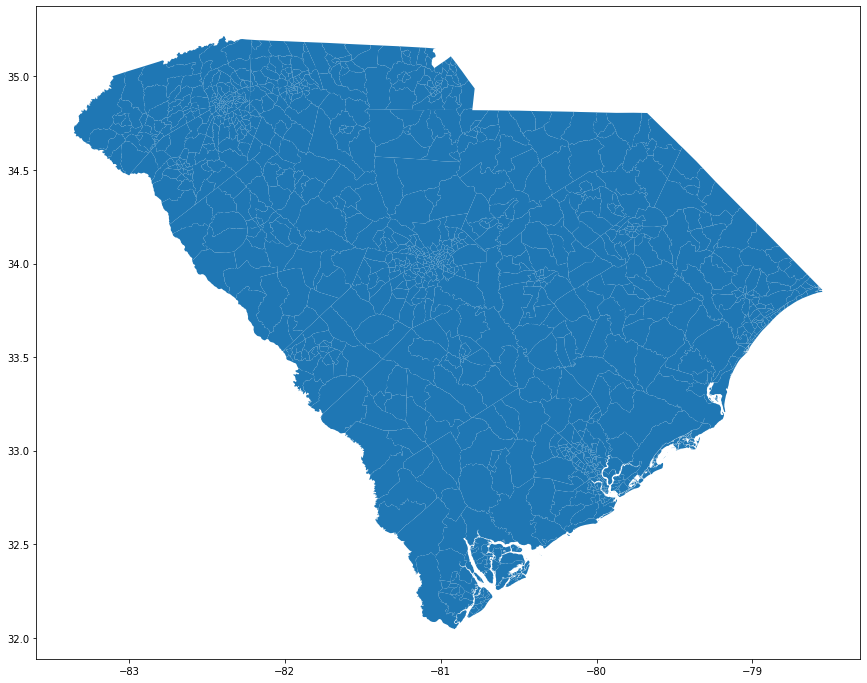

In [60]:
plt.rcParams['figure.figsize'] = (15, 12) #set default figure size

shapefile_url = r'https://github.com/GIBDUSC/Twitter-derived-human-mobility/raw/master/sc_tract.zip'

# zipresp = urlopen(shapefile_url)
# tempzip = open("tempfile.zip", "wb")
# tempzip.write(zipresp.read())
# tempzip.close()
# zf = ZipFile("tempfile.zip")
# zf.extractall(path = 'sc_tract.shp')
# zf.close()

tract_gdf = gpd.read_file(shapefile_url)
print(f"Len(tract_gdf): {len(tract_gdf)}")
tract_gdf.plot()

Len(county_gdf): 3221


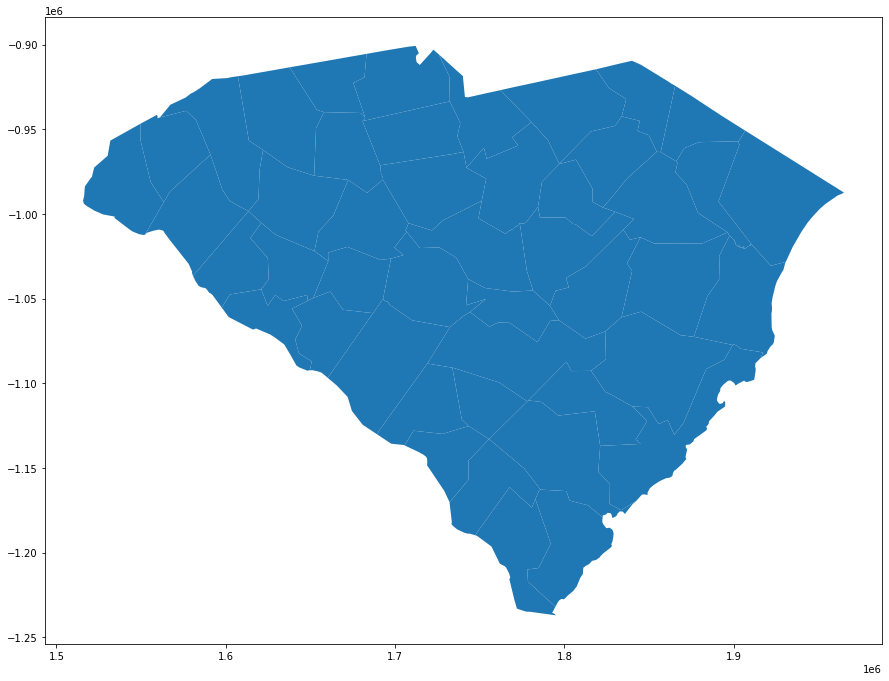

In [71]:
shapefile_url = r'https://github.com/GIBDUSC/test/raw/master/us_counties.zip'

# zipresp = urlopen(shapefile_url)
# tempzip = open("tempfile.zip", "wb")
# tempzip.write(zipresp.read())
# tempzip.close()
# zf = ZipFile("tempfile.zip")
# zf.extractall(path = 'us_counties.shp')
# zf.close()

county_gdf = gpd.read_file(shapefile_url).to_crs("EPSG:2163")
print(f"Len(county_gdf): {len(county_gdf)}")
county_gdf.count

county_gdf['fips'] = county_gdf['FIPS'].str[2:]
county_gdf =  county_gdf.loc[county_gdf.STATE=="45"]
county_gdf.plot()

In [62]:
county_gdf.head()

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,FIPS,fips_1,average_20,complete_2,average_48,complete_4,average_50,complete_5,average_75,complete_7,geometry,fips
0,0500000US01001,01,001,Autauga,County,594.436,US01001,US01001,16,12,20,19,20,19,9,65,"POLYGON Z ((1269840.786 -1303980.441 0.000, 12...",01001
1,0500000US01009,01,009,Blount,County,644.776,US01009,US01009,16,14,20,15,20,15,9,73,"POLYGON Z ((1240382.558 -1149118.912 0.000, 12...",01009
2,0500000US01017,01,017,Chambers,County,596.531,US01017,US01017,4,12,5,19,0,19,16,65,"POLYGON Z ((1382944.368 -1225846.156 0.000, 13...",01017
3,0500000US01021,01,021,Chilton,County,692.854,US01021,US01021,16,12,20,19,20,19,9,65,"POLYGON Z ((1257515.470 -1230045.200 0.000, 12...",01021
4,0500000US01033,01,033,Colbert,County,592.619,US01033,US01033,16,14,20,15,20,15,9,73,"POLYGON Z ((1085909.684 -1080750.827 0.000, 10...",01033


## Load and prepare data

In [72]:
census = r'https://github.com/gladcolor/segregation_index/raw/master/US_tract_for_residential_segregation.zip'
us_df = pd.read_csv(census)
us_df['CountyFIPS'] = us_df['CountyFIPS'].astype(str).str.zfill(5)

df =  us_df.loc[us_df.StateAbbreviation=="SC"]
# df =  us_df   # study area: USA
df

,FIPS,CountyFIPS,StateAbbreviation,AreaTotal,TotalPopulation,White,BlackAfricanAmerican,AmericanIndianAlaskaNative,Asian,NativeHawaiianOtherPacificIslander,SomeOtherRace,TwoOrMoreRaces
58807,45001950100,45001,SC,48.778880,2981,2513,401,0,0,0,11,56
58808,45001950200,45001,SC,74.144420,4310,3397,693,0,79,0,11,130
58809,45001950300,45001,SC,101.494400,3464,3337,126,0,0,0,0,1
58810,45001950400,45001,SC,77.696790,5901,3940,1835,0,0,0,10,116
58811,45001950500,45001,SC,110.513600,5214,2580,2569,15,0,0,5,45
...,...,...,...,...,...,...,...,...,...,...,...,...
59905,45091061707,45091,SC,11.017450,10563,8947,929,83,177,0,153,274
59906,45091061708,45091,SC,10.567350,5910,5112,614,16,41,0,38,89
59907,45091061801,45091,SC,4.560665,2887,1955,770,0,22,0,39,101
59908,45091061802,45091,SC,9.449888,5331,4308,290,120,334,0,172,107


## Aggregate dataframe

In [73]:
df_county = df.groupby(['CountyFIPS']).agg(AreaTotalSum=('AreaTotal','sum'),
                                           TotalPopulationSum=('TotalPopulation','sum'),
                                           WhiteSum=('White','sum'),
                                           BlackAfricanAmericanSum=('BlackAfricanAmerican','sum')
                                          )
df_county

,AreaTotalSum,TotalPopulationSum,WhiteSum,BlackAfricanAmericanSum
CountyFIPS,,,,
45001,511.980980,24627,17221,6804
45003,1080.169046,168301,118946,42002
45005,412.416950,9024,2108,6664
45007,755.747666,198064,157968,31183
45009,395.562190,14376,5237,8786
45011,557.262480,21346,10863,9785
45013,923.480255,186095,138993,33027
45015,1233.895766,215044,143238,51660
45017,392.484400,14663,8169,6001


## Get the final data_df

In [74]:
df_sc = pd.merge(df, df_county, left_on='CountyFIPS', right_on="CountyFIPS",how="outer")
df_sc.to_csv("df_sc.csv")
df_sc

,FIPS,CountyFIPS,StateAbbreviation,AreaTotal,TotalPopulation,White,BlackAfricanAmerican,AmericanIndianAlaskaNative,Asian,NativeHawaiianOtherPacificIslander,SomeOtherRace,TwoOrMoreRaces,AreaTotalSum,TotalPopulationSum,WhiteSum,BlackAfricanAmericanSum
0,45001950100,45001,SC,48.778880,2981,2513,401,0,0,0,11,56,511.980980,24627,17221,6804
1,45001950200,45001,SC,74.144420,4310,3397,693,0,79,0,11,130,511.980980,24627,17221,6804
2,45001950300,45001,SC,101.494400,3464,3337,126,0,0,0,0,1,511.980980,24627,17221,6804
3,45001950400,45001,SC,77.696790,5901,3940,1835,0,0,0,10,116,511.980980,24627,17221,6804
4,45001950500,45001,SC,110.513600,5214,2580,2569,15,0,0,5,45,511.980980,24627,17221,6804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,45091061707,45091,SC,11.017450,10563,8947,929,83,177,0,153,274,695.825769,265872,197372,50998
1099,45091061708,45091,SC,10.567350,5910,5112,614,16,41,0,38,89,695.825769,265872,197372,50998
1100,45091061801,45091,SC,4.560665,2887,1955,770,0,22,0,39,101,695.825769,265872,197372,50998
1101,45091061802,45091,SC,9.449888,5331,4308,290,120,334,0,172,107,695.825769,265872,197372,50998


# Compute and visualize the Indices


Calculating index of :  Dissimilarity


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


Calculating index of :  Isolation 
Calculating index of :  Delta
Calculating index of :  Absolute_Centralization


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


Calculating index of :  Spatial_Proximity 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


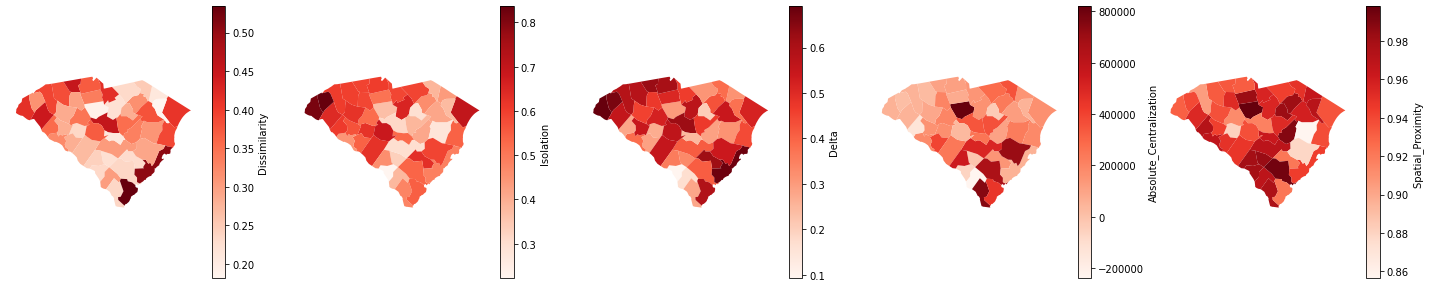

In [90]:


def calculate_dissimilarity(df):
    result = (df['BlackAfricanAmerican'] / df['BlackAfricanAmericanSum'] - df['White'] / df['WhiteSum']).abs().sum() * 0.5
    return result

def calculate_isolation(df):
    result = (df['BlackAfricanAmerican'] / df['BlackAfricanAmericanSum'] * df['White'] / df['TotalPopulation']).sum()
    return result

def calculate_delta(df):
    result = (df['BlackAfricanAmerican'] / df['BlackAfricanAmericanSum'] - df['AreaTotal'] / df['AreaTotalSum']).abs().sum() * 0.5
    return result

# do not understand yet. Huan
def calculate_centralization(df):
    df = df.sort_values("AreaTotal").reset_index()
    N = len(df)
    sum_m_i = 0
    sum_m_i_1 = 0
    # print(df)
    for i in range(1, N):
        m_i = df.at[i, 'BlackAfricanAmerican']
        m_i_1 = df.at[i - 1, 'BlackAfricanAmerican']

        a_i = df.at[i, 'AreaTotal']
        a_i_1 = df.at[i - 1, 'AreaTotal']

        sum_m_i += m_i_1 * a_i
        sum_m_i_1 += m_i * a_i_1
    
    ACI = sum_m_i - sum_m_i_1

    return ACI

def calculate_proximity(df):
    df = df.reset_index()
    N = len(df)
    # print((df))
    Pxx = 0
    Prr = 0
    Ptt = 0
    
    for i in range(N):
        a_i = df.at[i, 'AreaTotal']

        m_i = df.at[i, 'BlackAfricanAmerican']
        M = df.at[i, 'BlackAfricanAmericanSum']
        
        r_i = df.at[i, 'White']
        R = df.at[i, 'WhiteSum']

        t_i = df.at[i, 'TotalPopulation']
        T = df.at[i, 'TotalPopulationSum']

        e_exp = math.sqrt(0.6 * a_i)

        # for j in range(i, N):   # Do not get the same result as range(N). 
        for j in range(N):
            m_j = df.at[j, 'BlackAfricanAmerican']   
            Pxx += m_i * m_j * math.exp(-e_exp) / M**2

            r_j = df.at[j, 'White'] 
            Prr += r_i * r_j * math.exp(-e_exp) / R**2

            t_j = df.at[j, 'TotalPopulation']
            Ptt += t_i * t_j * math.exp(-e_exp) / T**2
    
    SPI = (M * Pxx*2 + R * Prr*2) / (T * Ptt*2)
    
    return SPI


# Zhenlong
# diss = df_sc.groupby(['CountyFIPS'])["White", "BlackAfricanAmerican","WhiteSum", "BlackAfricanAmericanSum"].apply(
#     lambda x : 0.5*abs(x.BlackAfricanAmerican/x.BlackAfricanAmericanSum - x.White/x.WhiteSum).sum()
# ).reset_index(name='Dissimilarity')

indices_functions = {"Dissimilarity":calculate_dissimilarity,
                     "Isolation ":calculate_isolation,
                     "Delta":calculate_delta,
                     "Absolute_Centralization":calculate_centralization,
                     "Spatial_Proximity ":calculate_proximity,
                     }

fig, axs = plt.subplots(1, len(indices_functions.keys()), figsize=(25, 5))


def calculate_indices():
    i = 0
    for key in indices_functions.keys():

        print("Calculating index of : ", key)

        result_df = df_sc.groupby(['CountyFIPS']).apply(
            indices_functions[key]    # Change the calculate index function here. 

        ).reset_index(name=key)


        result_df['CountyFIPS'] = result_df['CountyFIPS'].astype(str)
        county_gdf['fips'] = county_gdf['fips'].astype(str)

        # EPSG:2163, US National Atlas Equal Area
        # WGS84 Bounds: -66.0200, 15.3200, 168.3300, 74.7900
        # Projected Bounds: -8040784.5135, -2577524.9210, 3668901.4484, 4785105.1096
        # fig, ax = plt.subplots(figsize = (15,10))

        # ax.set_xlim([-2400000,  2640000])
        # ax.set_ylim([-2400000, 1000000])

        joined_gdf = pd.merge(county_gdf, result_df, left_on='fips', right_on="CountyFIPS")
        ax = axs[i]
        ax.axis("off")
        joined_gdf.to_crs(2163).plot(ax=ax,
                                    column=key, 
                                    #  vmin=0, 
                                    #  vmax=0.6, 
                                    cmap='Reds', 
                                    legend_kwds={'orientation':'vertical',"label": key},
                                    legend=True,
                                    # figsize=(20, 4)).axis("off"),

                                    )
     

        joined_gdf.to_file(f'/content/drive/MyDrive/Research/segregation/segeration_{key}.shp')
        i += 1

    return joined_gdf

joined_gdf = calculate_indices()


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_sc

,FIPS,CountyFIPS,StateAbbreviation,AreaTotal,TotalPopulation,White,BlackAfricanAmerican,AmericanIndianAlaskaNative,Asian,NativeHawaiianOtherPacificIslander,SomeOtherRace,TwoOrMoreRaces,AreaTotalSum,TotalPopulationSum,WhiteSum,BlackAfricanAmericanSum
0,45001950100,45001,SC,48.778880,2981,2513,401,0,0,0,11,56,511.980980,24627,17221,6804
1,45001950200,45001,SC,74.144420,4310,3397,693,0,79,0,11,130,511.980980,24627,17221,6804
2,45001950300,45001,SC,101.494400,3464,3337,126,0,0,0,0,1,511.980980,24627,17221,6804
3,45001950400,45001,SC,77.696790,5901,3940,1835,0,0,0,10,116,511.980980,24627,17221,6804
4,45001950500,45001,SC,110.513600,5214,2580,2569,15,0,0,5,45,511.980980,24627,17221,6804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,45091061707,45091,SC,11.017450,10563,8947,929,83,177,0,153,274,695.825769,265872,197372,50998
1099,45091061708,45091,SC,10.567350,5910,5112,614,16,41,0,38,89,695.825769,265872,197372,50998
1100,45091061801,45091,SC,4.560665,2887,1955,770,0,22,0,39,101,695.825769,265872,197372,50998
1101,45091061802,45091,SC,9.449888,5331,4308,290,120,334,0,172,107,695.825769,265872,197372,50998


In [ ]:
df_sc.dtypes

FIPS                                    int64
CountyFIPS                              int64
StateAbbreviation                      object
AreaTotal                             float64
TotalPopulation                         int64
White                                   int64
BlackAfricanAmerican                    int64
AmericanIndianAlaskaNative              int64
Asian                                   int64
NativeHawaiianOtherPacificIslander      int64
SomeOtherRace                           int64
TwoOrMoreRaces                          int64
AreaTotalSum                          float64
TotalPopulationSum                      int64
WhiteSum                                int64
BlackAfricanAmericanSum                 int64
dtype: object

In [ ]:
diss

,CountyFIPS,Dissimilarity
0,45001,0.357654
1,45003,0.270813
2,45005,0.234771
3,45007,0.445046
4,45009,0.225682
5,45011,0.244713
6,45013,0.534041
7,45015,0.292327
8,45017,0.210231
9,45019,0.505939
